In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
df = pd.read_csv('heart_disease_uci.csv')
print(df.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [9]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [15]:
    columnas_media = ['age', 'thalch',"oldpeak","ca"]  # Columnas a rellenar con la media
    columnas_mediana = [ 'trestbps', 'chol']  # Columnas a rellenar con la mediana
    columnas_moda = ['sex', 'fbs', 'restecg',"thal","slope","exang"]  # Columnas a rellenar con la moda

    # Rellenar valores nulos con la media, mediana o moda según corresponda
    for col in columnas_media:
        df[col] = df[col].fillna(df[col].mean())

    for col in columnas_mediana:
        df[col] = df[col].fillna(df[col].median())

    for col in columnas_moda:
        df[col] = df[col].fillna(df[col].mode()[0])

    print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64



Distribución de la variable 'sex':
sex
Male      726
Female    194
Name: count, dtype: int64


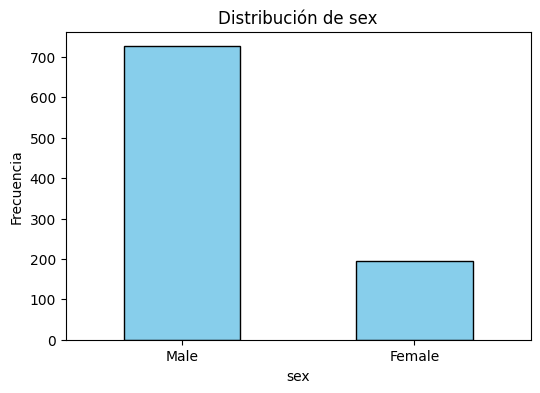


Distribución de la variable 'dataset':
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


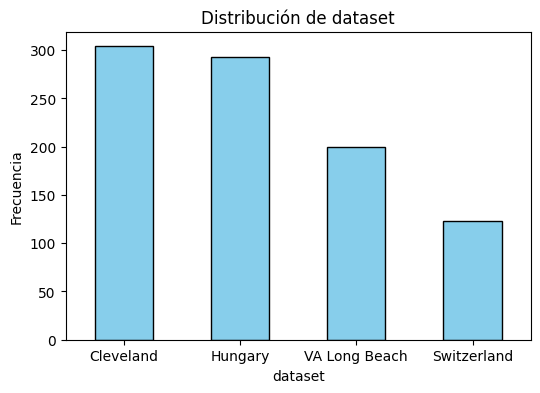


Distribución de la variable 'cp':
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


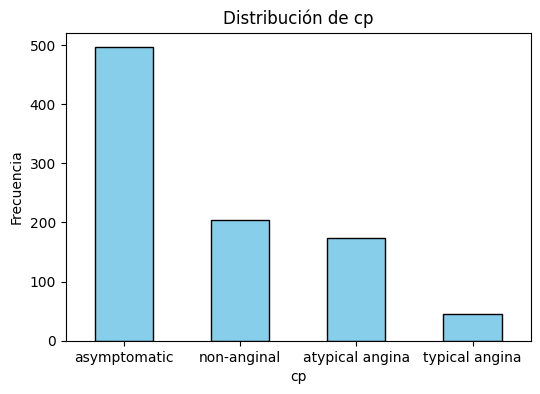


Distribución de la variable 'fbs':
fbs
False    692
True     138
Name: count, dtype: int64


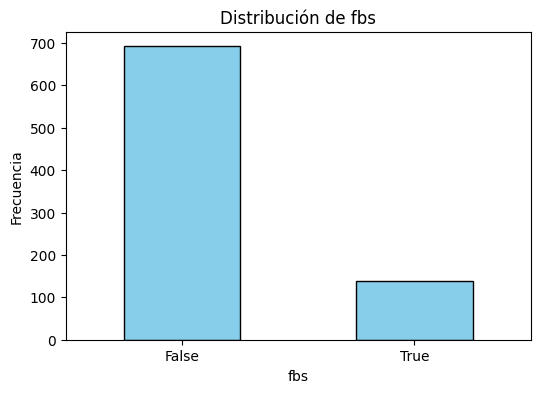


Distribución de la variable 'restecg':
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


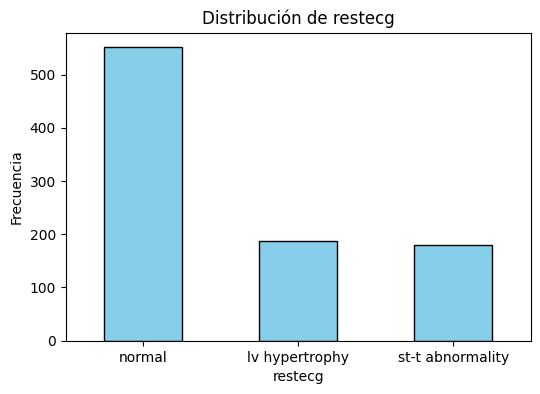


Distribución de la variable 'exang':
exang
False    528
True     337
Name: count, dtype: int64


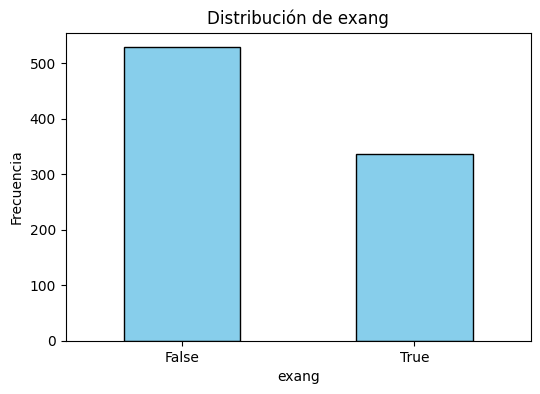


Distribución de la variable 'slope':
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


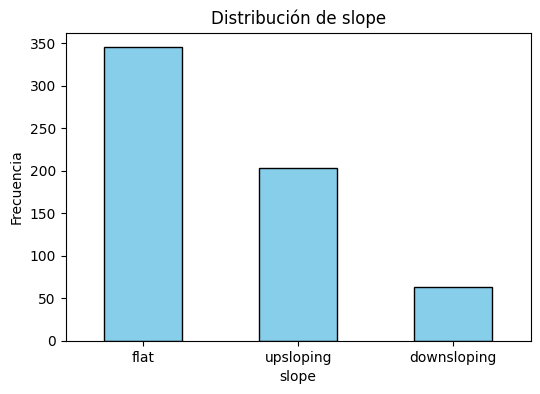


Distribución de la variable 'thal':
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


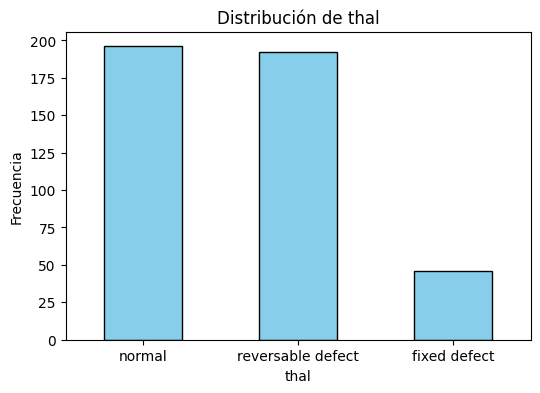

In [23]:
columnas_categoricas = ['sex', 'dataset' ,'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

    # Analizar la distribución de cada variable categórica
for col in columnas_categoricas:
    print(f"\nDistribución de la variable '{col}':")
    print(df[col].value_counts())  # Contar las frecuencias de cada categoría

    # Visualización de la distribución
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

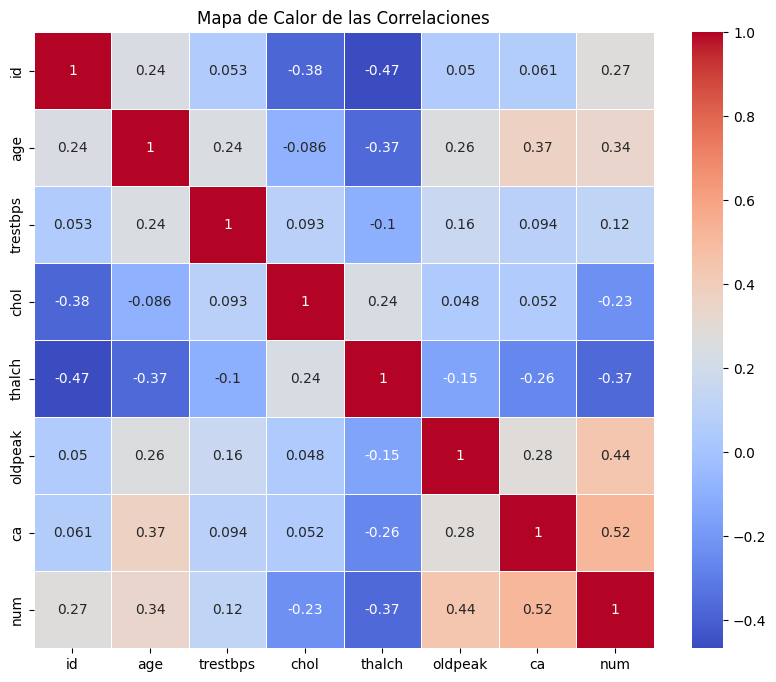

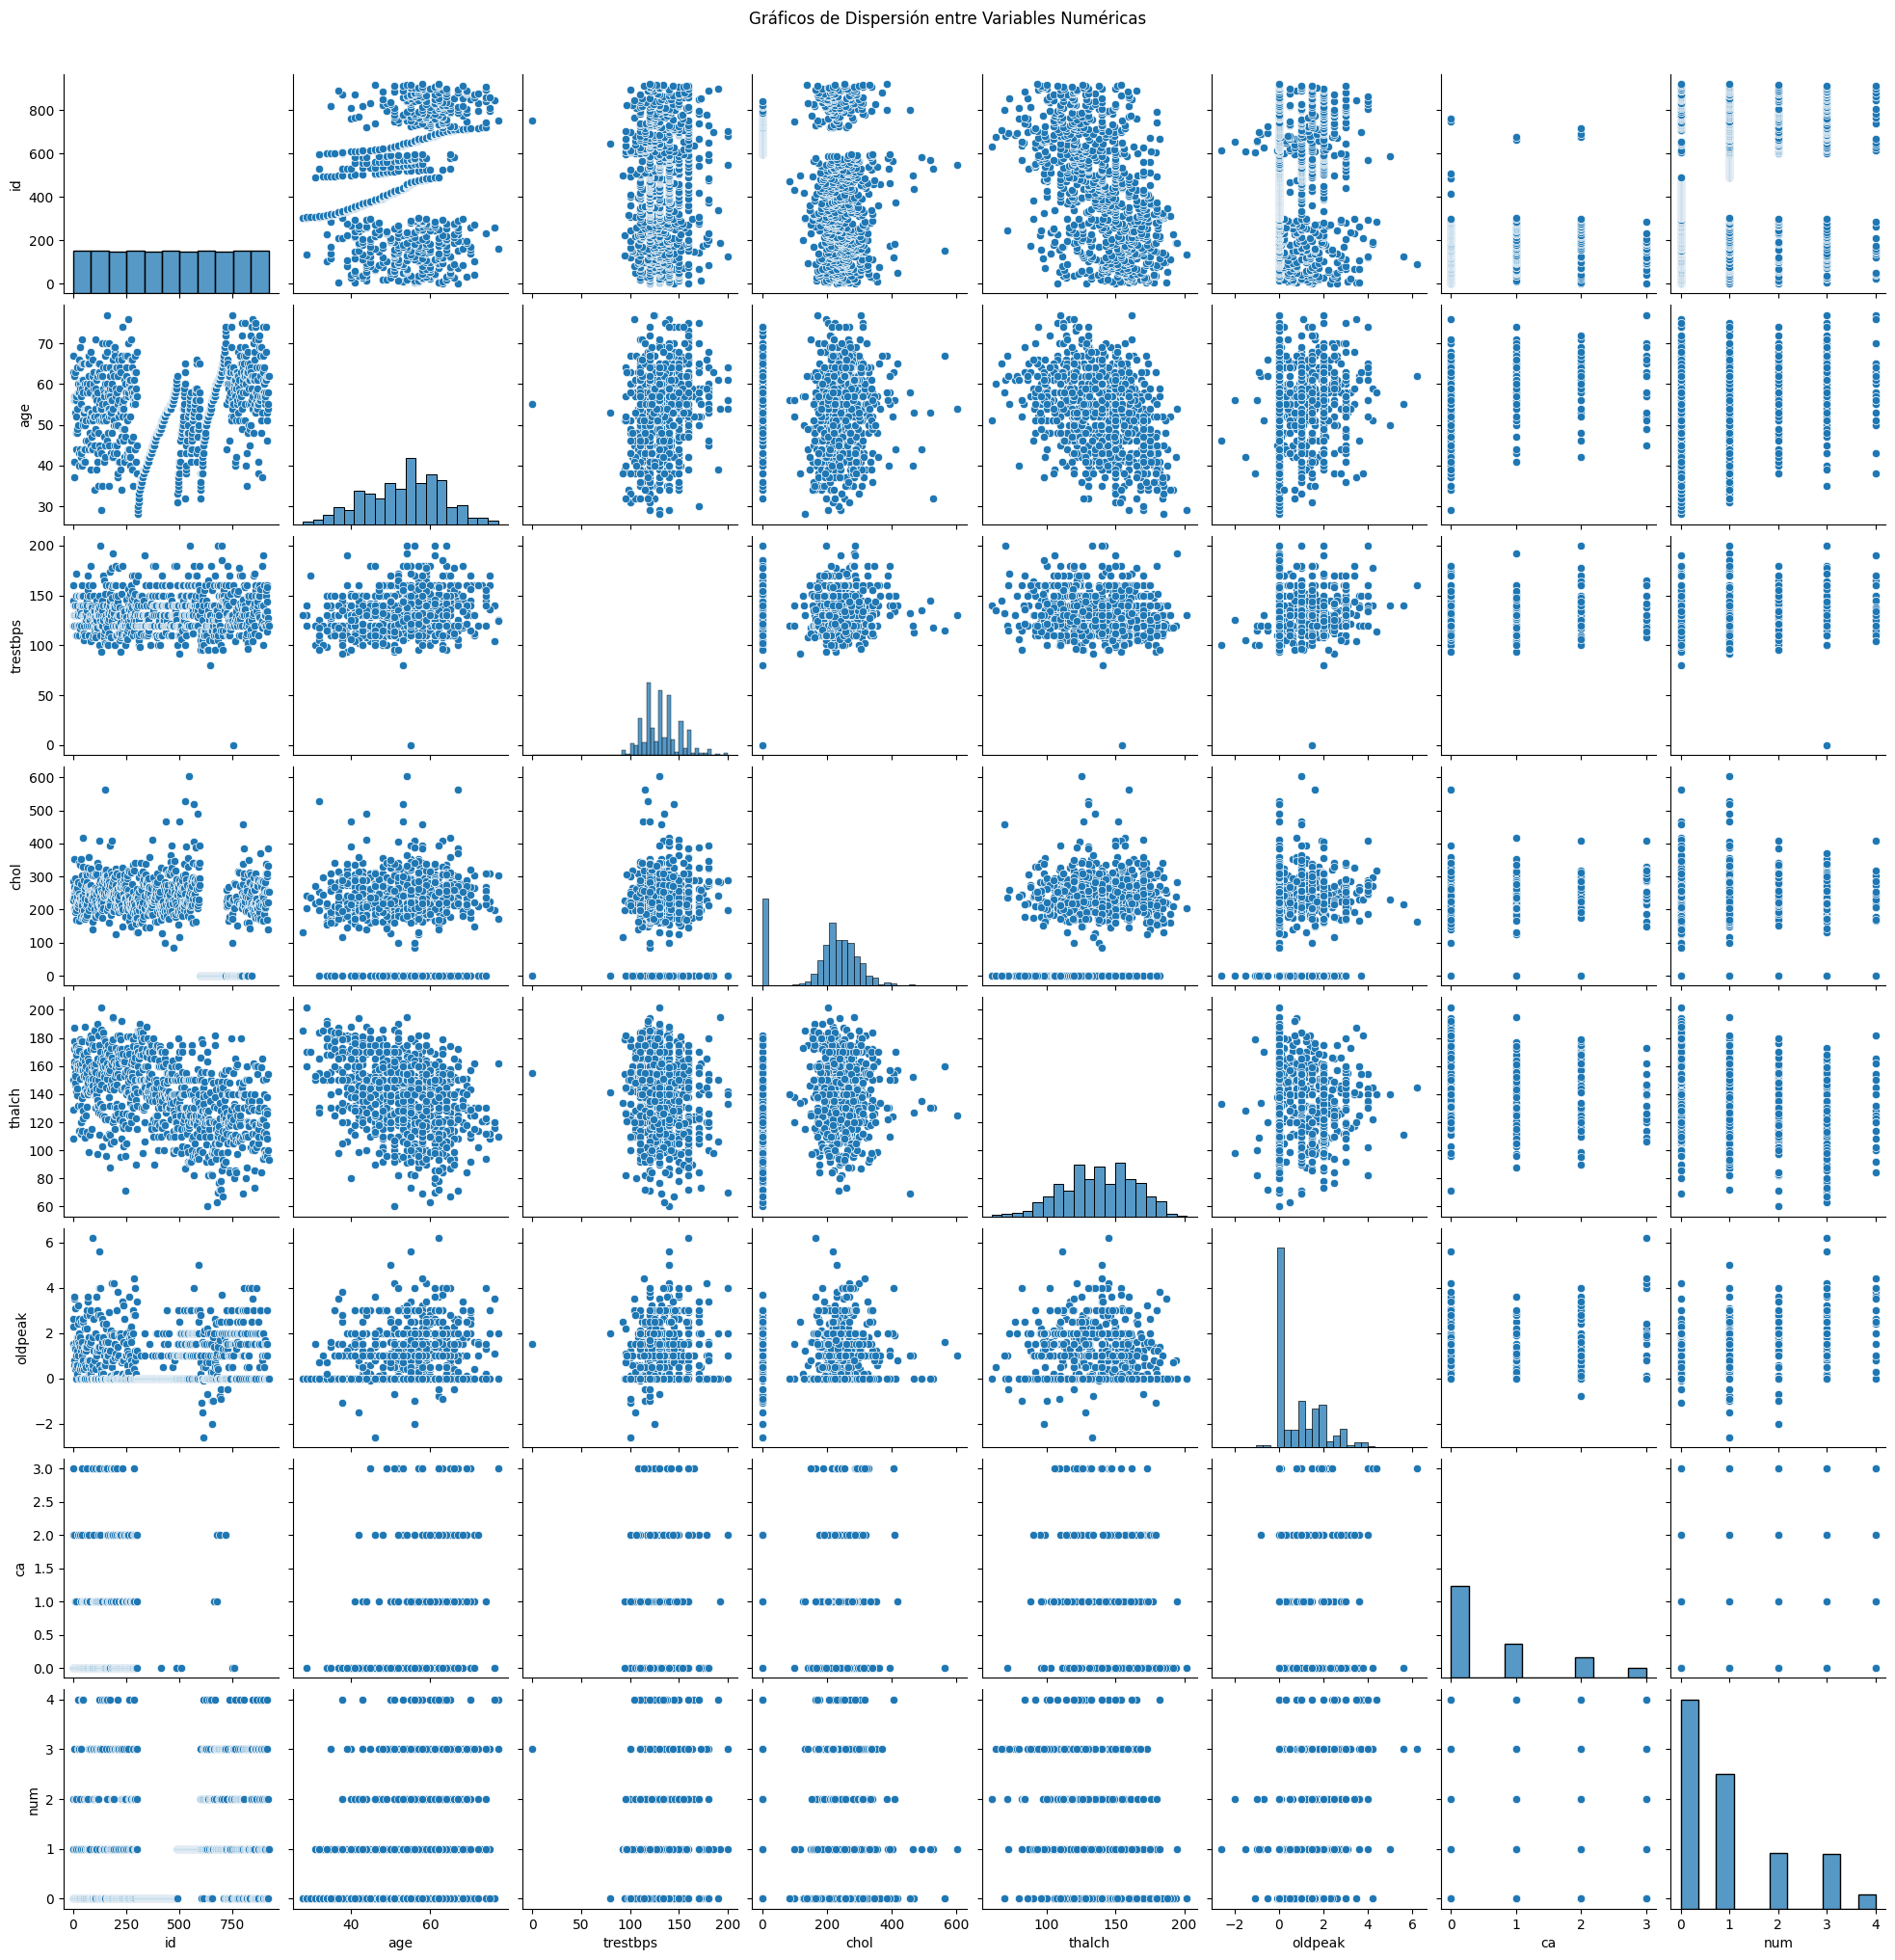

In [ ]:
df_numericas = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones')
plt.show()


sns.pairplot(df_numericas)
plt.suptitle('Gráficos de Dispersión entre Variables Numéricas', y=1.02)
plt.show()

In [ ]:
X = df.drop(columns=['num'])
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)